# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100) #0-5，中間切100個點
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100) #sin(3.2x)+0.8x+noise。np.random.randn()記得數量與x,y相同。

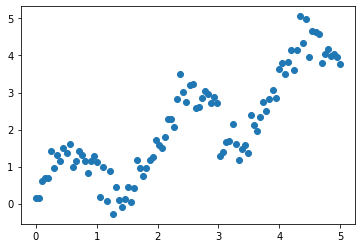

In [3]:
#畫出上述非線性的x,y
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
#記得reshape由1D轉2D
X = x.reshape(-1, 1)
print(X.shape) #確認是否為2D

(100, 1)


In [6]:
#將reshape後的X，與原始結果y做線性預測
regr_lin.fit(X,y)

LinearRegression()

0.5660390474504953


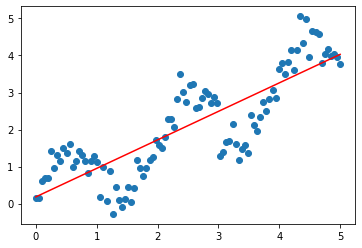

In [7]:
#將X帶入預測的線性公式內，會得到預測的Y
Y=regr_lin.predict(X)
#畫出原始資料
plt.scatter(x,y)
#畫出預測資料
plt.plot(x,Y , color='r')
#計算MSE
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape) #100筆，1個維度
print(X.shape)

(100,)
(100, 1)


In [10]:
#X_poly是新生成的多項式套解
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  #多項式，改至五個維度。x共有100筆。 #add k**6 to try it
print(X_poly.shape) #100筆資料，每一筆都有5個維度

(100, 5)


In [11]:
#新生成多項式回歸解
regr_poly = LinearRegression()

In [12]:
#將新生成多項式狀態的X_poly與實際y做fit訓練
regr_poly.fit(X_poly, y) #前面線性是丟入轉為2D的X與real y。

LinearRegression()

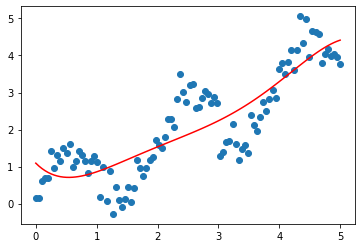

In [13]:
plt.scatter(x,y) #原始
plt.plot(x, regr_poly.predict(X_poly), 'r') #Predict_Y=regr_poly.predict(X_poly)。X_poly帶入預測曲線

In [14]:
#一樣會有斜率Coefficients和截距interception，只是因為是多項式形式，會有五個Coef
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.64651878  2.20443972 -0.97863527  0.20191634 -0.01517565]
interception:  1.0913845500627062


In [23]:
W=regr_poly.coef_ #一維的1x5
b=regr_poly.intercept_
#X為100筆資料，每筆有五的維度的數值。所以是二維的100x5
#現在的狀態是矩陣，若需要做dot運算。需要轉置<.T>(不論是X_poly還是W轉，都可以)。算出來要是100x1的結果
Pred_poly_Y=np.dot(X_poly,W.T)+b #預測結果
print(Pred_poly_Y)
print(Pred_poly_Y.shape)

[1.09138455 1.01372527 0.94657378 0.88922019 0.84098492 0.80121817
 0.76929922 0.74463593 0.72666408 0.71484679 0.70867393 0.70766152
 0.7113511  0.7193092  0.73112665 0.74641807 0.7648212  0.78599637
 0.80962582 0.8354132  0.86308287 0.89237937 0.92306682 0.95492826
 0.98776514 1.02139664 1.05565914 1.09040555 1.1255048  1.16084115
 1.19631366 1.23183555 1.26733362 1.30274767 1.33802985 1.37314411
 1.40806558 1.44277997 1.47728299 1.51157972 1.54568406 1.57961806
 1.61341139 1.64710072 1.6807291  1.71434538 1.74800363 1.78176249
 1.81568462 1.84983608 1.88428575 1.9191047  1.95436561 1.99014218
 2.02650852 2.06353855 2.1013054  2.13988084 2.17933462 2.21973395
 2.26114284 2.30362153 2.34722588 2.39200678 2.43800954 2.48527332
 2.5338305  2.58370608 2.63491711 2.68747207 2.74137028 2.7966013
 2.85314434 2.91096762 2.97002784 3.03026953 3.09162446 3.15401107
 3.21733383 3.28148267 3.34633237 3.41174197 3.47755417 3.54359471
 3.60967181 3.67557555 3.74107726 3.80592893 3.86986265 3.93258

In [19]:
#函式型態。預測結果也是必須與上面直接函式帶入的結果相同。
regr_poly.predict(X_poly)

array([1.09138455, 1.01372527, 0.94657378, 0.88922019, 0.84098492,
       0.80121817, 0.76929922, 0.74463593, 0.72666408, 0.71484679,
       0.70867393, 0.70766152, 0.7113511 , 0.7193092 , 0.73112665,
       0.74641807, 0.7648212 , 0.78599637, 0.80962582, 0.8354132 ,
       0.86308287, 0.89237937, 0.92306682, 0.95492826, 0.98776514,
       1.02139664, 1.05565914, 1.09040555, 1.1255048 , 1.16084115,
       1.19631366, 1.23183555, 1.26733362, 1.30274767, 1.33802985,
       1.37314411, 1.40806558, 1.44277997, 1.47728299, 1.51157972,
       1.54568406, 1.57961806, 1.61341139, 1.64710072, 1.6807291 ,
       1.71434538, 1.74800363, 1.78176249, 1.81568462, 1.84983608,
       1.88428575, 1.9191047 , 1.95436561, 1.99014218, 2.02650852,
       2.06353855, 2.1013054 , 2.13988084, 2.17933462, 2.21973395,
       2.26114284, 2.30362153, 2.34722588, 2.39200678, 2.43800954,
       2.48527332, 2.5338305 , 2.58370608, 2.63491711, 2.68747207,
       2.74137028, 2.7966013 , 2.85314434, 2.91096762, 2.97002

In [25]:
mse = np.sum((Pred_poly_Y-y)**2) / len(y)
print(mse)
#還是很差

0.49660996613137415


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [26]:
# normal distrubution 常態分佈
def RBF(x, center, sigma): #給定平均值，標準差，即可算常態分佈結果
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [27]:
sigma = 0.3 #假設值

In [28]:
#將x丟入，一樣是五條。讓平均值為0.5/1.5/2.5/3.5/4.5及sigma去做運算
#讓原始資料100筆，變成100x5的維度。
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [29]:
regr_rbf = LinearRegression() #指定線性回歸程式給regr_rbf

In [30]:
regr_rbf.fit(X_rbf, y) #預測

LinearRegression()

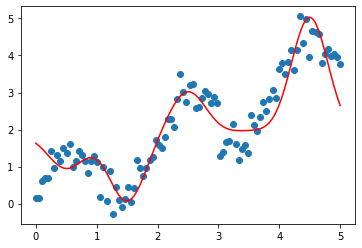

In [31]:
plt.scatter(x,y) #原始
plt.plot(x, regr_rbf.predict(X_rbf), 'r') #RBF預測結果

In [32]:
print('Coefficients: ', regr_rbf.coef_) #前面有五個RBF(k, xx, sigma)參數，所以也會有五個參數
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.90332416 -1.78732382  1.17210879  0.10219267  3.17841353]
interception:  1.856379918445417


#### Comparison

In [33]:
#同時比較三種不同predict方式所得到的predict Y
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

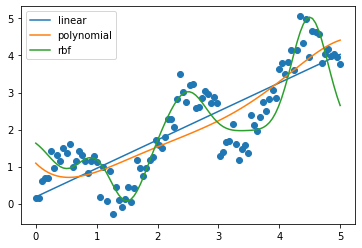

In [34]:
plt.scatter(x,y) #原始

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [35]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5660390474504953


In [36]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.49660996613137415


In [37]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2639882730862239
